In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [12]:
df=pd.read_csv('D:\\python\\Titanic_ML\\dollar vs Rs\\EXINUS.csv', parse_dates=['DATE'])

In [13]:
df.head()

,DATE,EXINUS
0,1973-01-01,8.0041
1,1973-02-01,7.7538
2,1973-03-01,7.5465
3,1973-04-01,7.5462
4,1973-05-01,7.4927


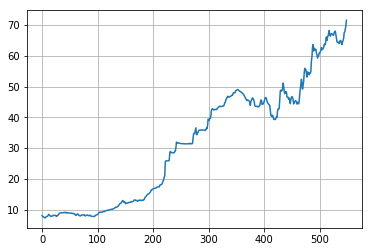

In [14]:
df['EXINUS'].plot(grid=True)

In [15]:
rupees=df['EXINUS']
date=df['DATE']
df1=df[['DATE', 'EXINUS']]
df2=df1.set_index('DATE')
df2.sort_index(inplace=True)

In [16]:
df2.head()

,EXINUS
DATE,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927


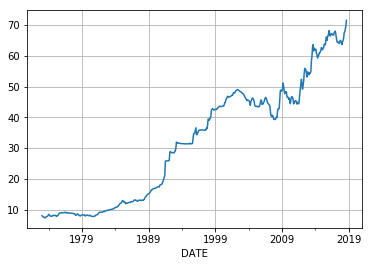

In [17]:
df2['EXINUS'].plot(grid=True)

In [8]:
df2.index

Index(['1973-01-01', '1973-02-01', '1973-03-01', '1973-04-01', '1973-05-01',
       '1973-06-01', '1973-07-01', '1973-08-01', '1973-09-01', '1973-10-01',
       ...
       '2017-12-01', '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
       '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01'],
      dtype='object', name='DATE', length=549)

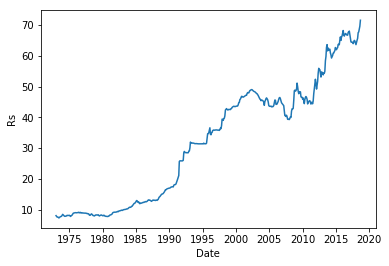

In [18]:
plt.plot(df2)
plt.xlabel('Date')
plt.ylabel('Rs')
plt.show()

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 549 entries, 1973-01-01 to 2018-09-01
Data columns (total 1 columns):
EXINUS    549 non-null float64
dtypes: float64(1)
memory usage: 8.6 KB


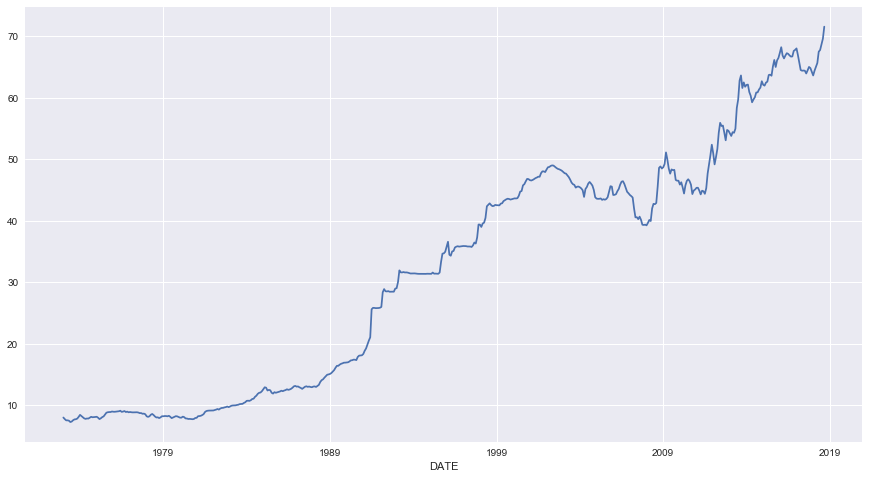

In [41]:
plt.figure(figsize=(15,8))
df2['EXINUS'].plot(grid=True)

In [27]:
df2['Com']=df2['EXINUS'].shift(1)
df2.head()

,EXINUS,Com
DATE,,
1973-01-01,8.0041,NaN
1973-02-01,7.7538,8.0041
1973-03-01,7.5465,7.7538
1973-04-01,7.5462,7.5465
1973-05-01,7.4927,7.5462


In [28]:
df2['difference']=df2['EXINUS']-df2['Com']

In [29]:
df2.head()

,EXINUS,Com,difference
DATE,,,
1973-01-01,8.0041,NaN,NaN
1973-02-01,7.7538,8.0041,-0.2503
1973-03-01,7.5465,7.7538,-0.2073
1973-04-01,7.5462,7.5465,-0.0003
1973-05-01,7.4927,7.5462,-0.0535


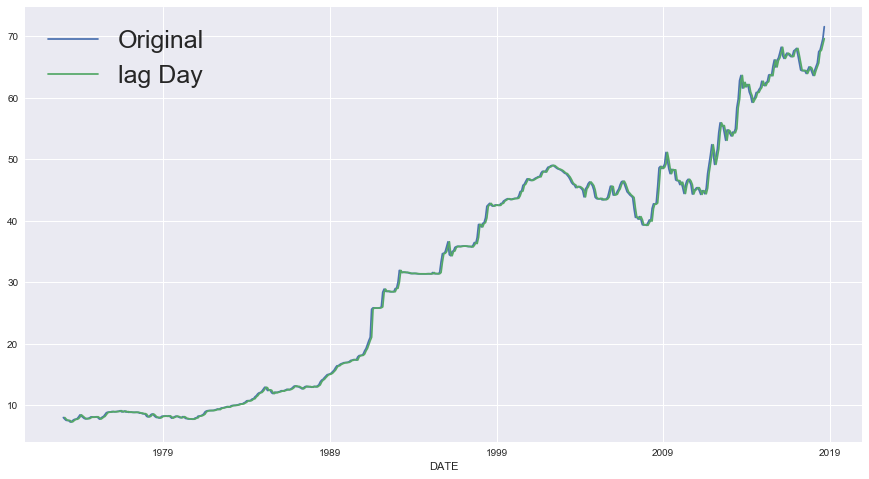

In [40]:
plt.figure(figsize=(15,8))
df2['EXINUS'].plot(grid=True, label="Original")
df2['Com'].plot(grid=True, label="lag Day")
plt.legend(fontsize=25)
plt.show()

Text(0.5,1,'Rolling mean & std')

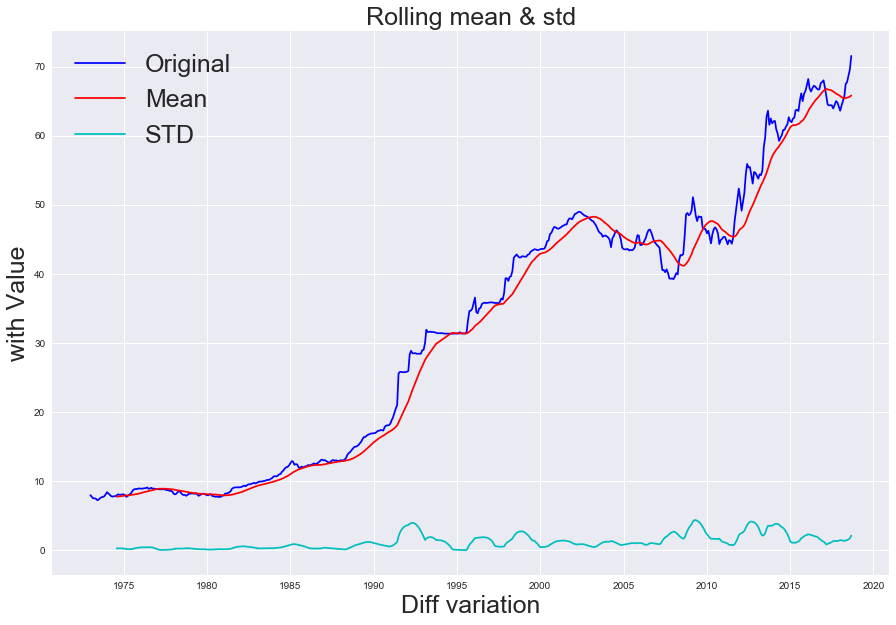

In [39]:
plt.figure(figsize=(15,10))

rol_mean=df2['EXINUS'].rolling(window=20, center=False).mean()
rol_std=df2['EXINUS'].rolling(window=20, center=False).std()

plt.plot(df2['EXINUS'], color='b', label='Original')
plt.plot(rol_mean, color='r', label='Mean')
plt.plot(rol_std, color='c', label='STD')

plt.xlabel('Diff variation', fontsize=25)
plt.ylabel('with Value', fontsize=25)
plt.legend(loc='best', fontsize=25)
plt.title('Rolling mean & std', fontsize=25)

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [45]:
decomposition=seasonal_decompose(df2['EXINUS'])

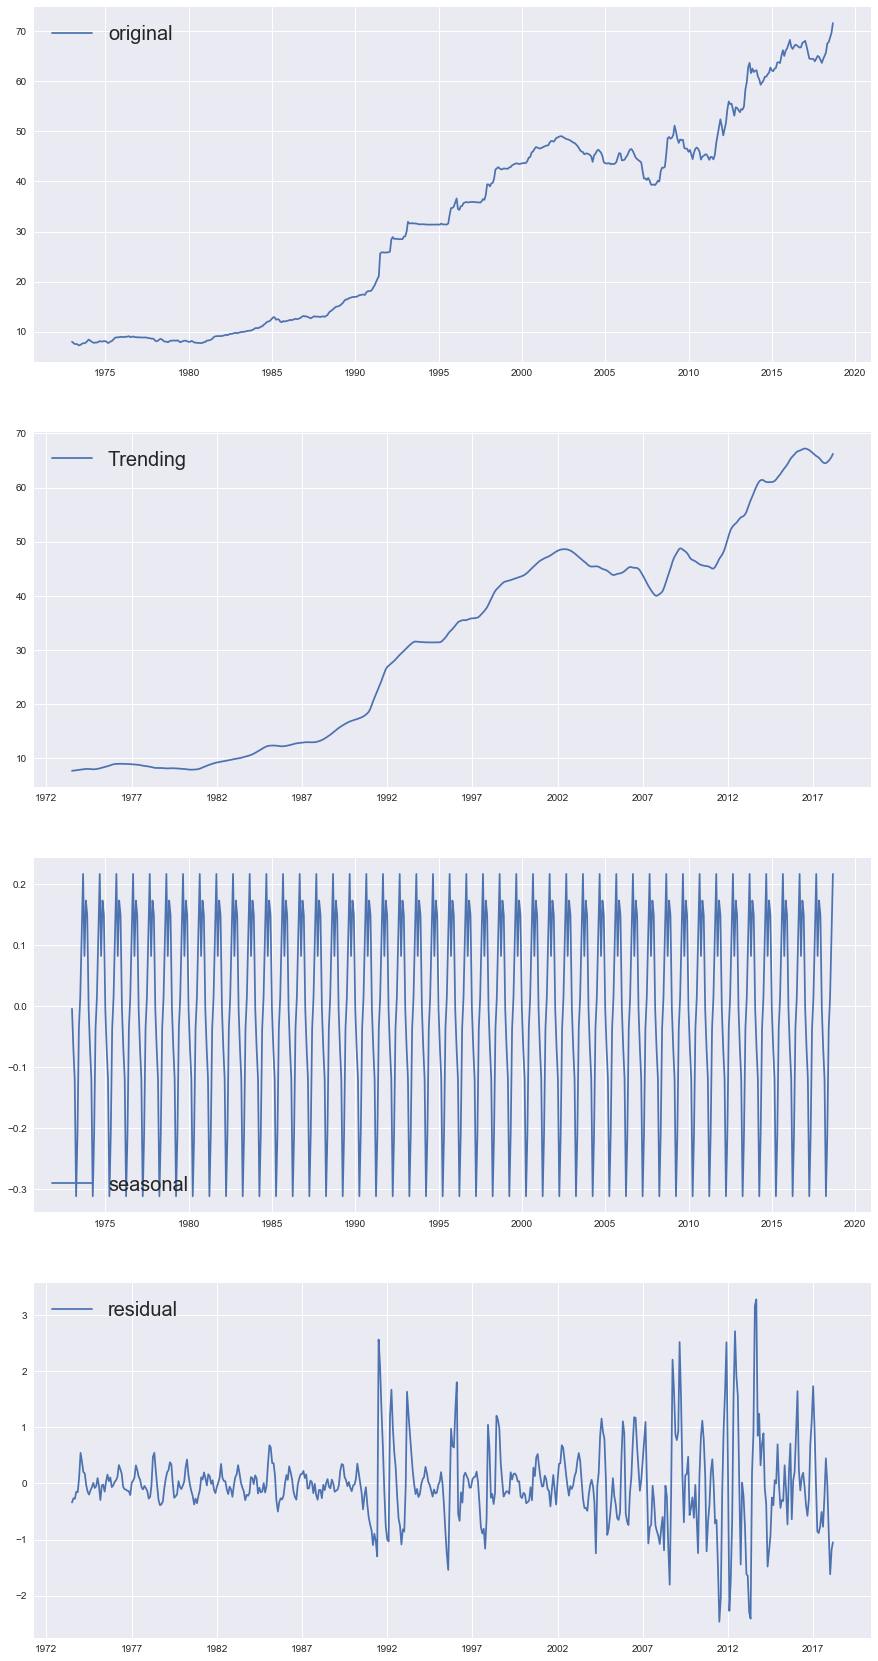

In [53]:
trend=decomposition.trend
seasonal=decomposition.seasonal
residue=decomposition.resid
plt.figure(figsize=(15,30))

plt.subplot(411)
plt.plot(df2['EXINUS'], label="original")
plt.legend(loc='best', fontsize=20)

plt.subplot(412)
plt.plot(trend, label="Trending")
plt.legend(loc='best', fontsize=20)

plt.subplot(413)
plt.plot(seasonal, label="seasonal")
plt.legend(loc='best', fontsize=20)

plt.subplot(414)
plt.plot(residue, label="residual")
plt.legend(loc="best", fontsize=20)
plt.show()

<Figure size 1080x720 with 0 Axes>

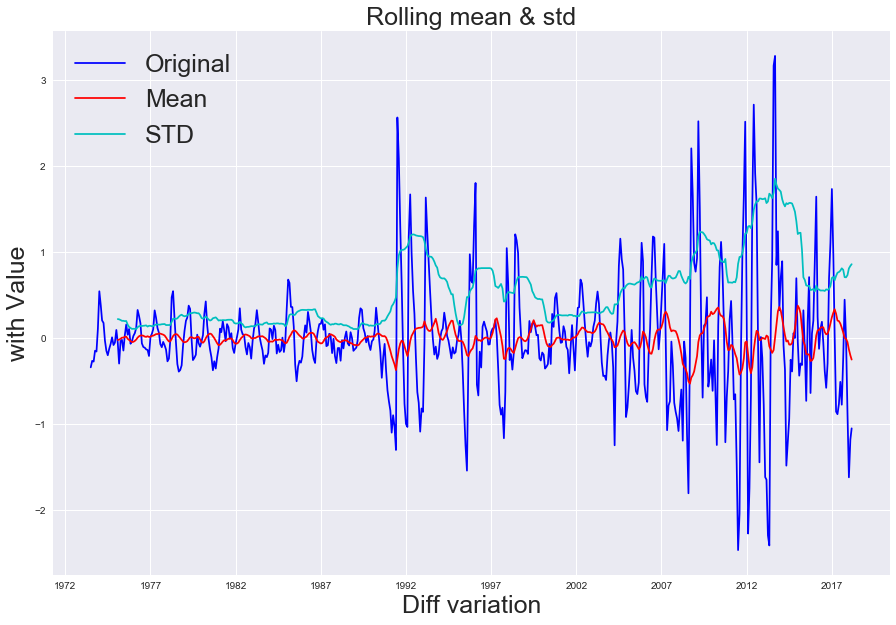

In [50]:
plt.figure(figsize=(15,10))
plt.figure(figsize=(15,10))

rol_mean=residue.rolling(window=20, center=False).mean()
rol_std=residue.rolling(window=20, center=False).std()

plt.plot(residue, color='b', label='Original')
plt.plot(rol_mean, color='r', label='Mean')
plt.plot(rol_std, color='c', label='STD')

plt.xlabel('Diff variation', fontsize=25)
plt.ylabel('with Value', fontsize=25)
plt.legend(loc='best', fontsize=25)
plt.title('Rolling mean & std', fontsize=25)
plt.show()

<Figure size 1080x720 with 0 Axes>

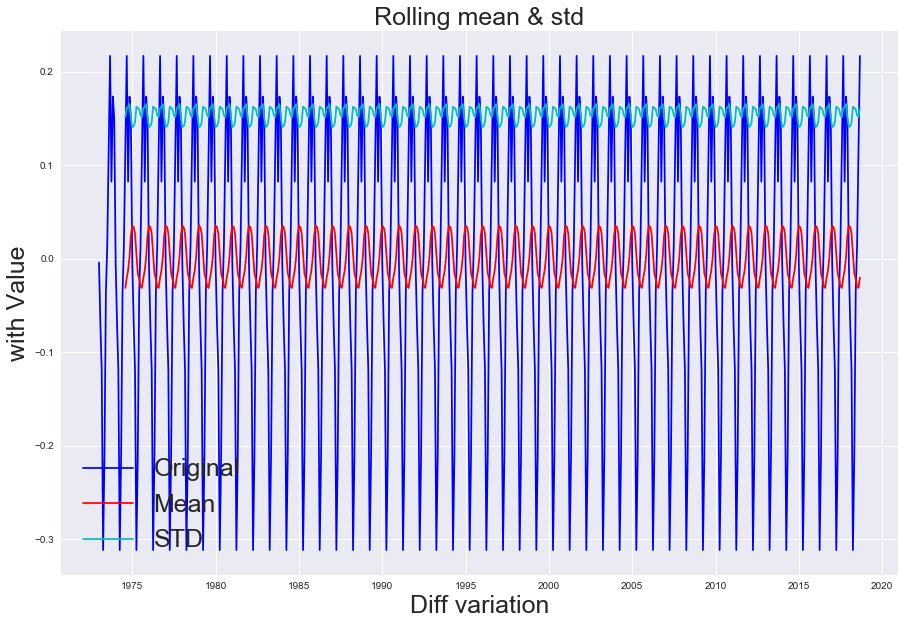

In [55]:
plt.figure(figsize=(15,10))
plt.figure(figsize=(15,10))

rol_mean=seasonal.rolling(window=20, center=False).mean()
rol_std=seasonal.rolling(window=20, center=False).std()

plt.plot(seasonal, color='b', label='Original')
plt.plot(rol_mean, color='r', label='Mean')
plt.plot(rol_std, color='c', label='STD')

plt.xlabel('Diff variation', fontsize=25)
plt.ylabel('with Value', fontsize=25)
plt.legend(loc='best', fontsize=25)
plt.title('Rolling mean & std', fontsize=25)
plt.show()

In [56]:
df2['t']=range (1, len(df)+1)
df2['sqr t ']=df2['t']**2
df2['tdx']=df2['t']*df['EXINUS']
n=len(df)

slope=(n*df2['tdx'].sum()- df2['t'].sum()*df['EXINUS'].sum())/(n*df2['sqr t '].sum()-(df2['t'].sum())**2)
print("slope is ", slope)

slope is  -0.3494491264807946


In [57]:
intercept=(df2['EXINUS'].sum()*df2['sqr t '].sum()- df2['t'].sum()*df2['tdx'].sum())/(n*df2['sqr t '].sum()-(df2['t'].sum())**2)
print("intercept value is :-", intercept)

intercept value is :- 128.0148633341311


In [59]:
df2['forcast']=intercept+slope*df2['t']
df2['error']=df2['EXINUS']-df2['forcast']
mean_error=df2['error'].mean()
print("the mean error is :-", mean_error)

the mean error is :- 2.950887864358886e-15
